In [16]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Algebra
## Allows us to represent information through vectors, matrices and tensors

## Index

- Comparing scalars and vectors
- Linear equations
- Matrix operations
- Vector spaces and subspaces
- Linear maps
- Matrix decomposition
- Appendix (Definitions)

# Comparing scalars and vectors

* Scalars are regular numbers
    - Only described by its **magnitude**

* Vectors
    - have magnitude and direction
    - **in many dimensions**
    - usually written bold


<center><img src="https://www.grc.nasa.gov/www/k-12/airplane/Images/vectors.jpg"/></center>


### Let's see an example of a vector
here we have a vector *x*

# $x= \begin{bmatrix}
x_{1}\\
x_{2}\\
.\\
.\\
.\\
x_{n}
\end{bmatrix} $

In [2]:
x1 = 1
x2 = 2
xn = 100
x = tf.constant([x1, x2, xn])
f'The shape is {x.numpy().shape}'

'The shape is (3,)'

### This indicates how vectors can only have shapes of (n, 1) where $n\in \mathbb{N} $
### But it could be that $x_{n}\in\mathbb{R}$

- $\mathbb{R}$ = Natural numbers are all the positive integers starting from 1 to infinity
- $\mathbb{N}$ = Real numbers are numbers that include both rational and irrational numbers. Rational numbers such as
 integers (-2, 0, 1), fractions(1/2, 2.5) and irrational numbers such as √3, π(22/7), etc., are all real numbers.



### As with regular numbers, we can add and subtract vectors (with some limitations)

### $\begin{bmatrix}
x_{1}\\
x_{2}\\
.\\
.\\
.\\
x_{n}
\end{bmatrix} +
\begin{bmatrix}
y_{1}\\
y_{2}\\
.\\
.\\
.\\
y_{n}
\end{bmatrix} =
\begin{bmatrix}
x_{1}+y_{1}\\
x_{2}+y_{2}\\
.\\
.\\
.\\
x_{n}+y_{n}
\end{bmatrix}$

### However they must match in **dimensions**

In [3]:
x = tf.constant([1, 2, 3])
y = tf.constant([2, 1, 0])

# Here we have 2 vectors x & y
# we can perform addition and subtraction on these vectors because they have the same dimensions
f'Shape(x): {x.shape} = Shape(y): {y.shape}'

'Shape(x): (3,) = Shape(y): (3,)'

In [4]:
# Now if we perform addition we can expect a vector of dimension 3 consisting of 3 3`s
x + y

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 3, 3])>

#### Before we move we should also know about Scalar multiplication with Vectors

# $\lambda x=\lambda\begin{bmatrix}
x_{1}\\
x_{2}\\
.\\
.\\
.\\
x_{n}
\end{bmatrix}
=
\begin{bmatrix}
\lambda x_{1}\\
\lambda x_{2}\\
.\\
.\\
.\\
\lambda x_{n}
\end{bmatrix}
$

#### As we can see $\lambda$ gets multiplied with each $x_{i}$ in the vector. The result is that the vector gets scaled by the value of the scaler $\lambda$

# Linear Equations

#### Linear Algebra at its core is about solving a set of linear equations, referred to as a **system of equations**

## Let's take two equations as an example:

### $
x-2y=1\\
2x+y=7
$

Both equations produce straight lines. The solution to both equations is the point where they intersect
In our case we will write the equations as **vector equations**:

### $
x
\begin{bmatrix}
1\\
2
\end{bmatrix}
+
y
\begin{bmatrix}
-2\\
1
\end{bmatrix}
=
x
\begin{bmatrix}
1\\
7
\end{bmatrix}
=
b

$

Here **b** is the result vector
### But how can we solve for b ?

### Using what is known as the **coefficient matrix**, we can express the system of equations as a matrix problem in the form of $Av=b$:

#### $
\begin{bmatrix}
1 & -2\\
2 & 1
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
\begin{bmatrix}
1\\
7
\end{bmatrix}
$

### Moving on, we'll express most of our problems in this format.

### As the process of solving for an equation starts getting into matrices, we'll need to develop an understanding of some of the core matrix operations


#### This part of the equation requires multiplication of A and v:
#### $
\begin{bmatrix}
1 & -2\\
2 & 1
\end{bmatrix}
\begin{bmatrix}
x\\
y
\end{bmatrix}
$

#### so this is what we'll look at first.


#### Take this matrix multiplication for example:

#### $
\begin{bmatrix}
a & b & c\\
d & e & f\\
g & h & i
\end{bmatrix}
\begin{bmatrix}
v_{1}\\
v_{2}\\
v_{3}\\
v_{4}
\end{bmatrix}
=
\begin{bmatrix}
av_{1} + bv_{2} + cv_{3}\\
dv_{1} + ev_{2} + fv_{3}\\
gv_{1} + hv_{2} + iv_{3}\\
\end{bmatrix}
=
v_{1}
\begin{bmatrix}
a\\
d\\
g
\end{bmatrix}
+
v_{2}
\begin{bmatrix}
b\\
e\\
h
\end{bmatrix}
+
v_{3}
\begin{bmatrix}
c\\
f\\
i
\end{bmatrix}
$

#### First and foremost we need to note that vector multiplication is only possible when the columns in the matrix are equal to the number of rows in the vector.
#### Luckily this is the case in our matrix multiplication seen above where $M=3x3 \;\&\; V=3x1$

#### There is another very important vector/matrix operation called the `dot product`, which is a type of multiplication
#### Let's take two vectors in $\mathbb{R}^{2}$ (2-D):

#### $
v=\begin{bmatrix}
v_{1}\\
v_{2}
\end{bmatrix}

w=\begin{bmatrix}
w_{1}\\
w_{2}
\end{bmatrix}

$


#### The following is the dot product:

#### $
v \cdot w = v_{1}w_{1}+v_{2}w_{2}
$

#### Let's take a look at an example

#### Let there be 2 vectors:

#### $
v=\begin{bmatrix}
1\\
2
\end{bmatrix}
w=\begin{bmatrix}
-2\\
1
\end{bmatrix}
$

In [10]:
v = tf.constant([1, 2])
v.numpy()

array([1, 2])

In [9]:
w = tf.constant([-2, 1])
w.numpy()

array([-2,  1])

In [14]:
tf.tensordot(v, w, axes=1).numpy()

0

#### Hmmm...
#### We get 0 as a result of the dot-product for v & w

#### If we do the calculations ourselves we'll see why:

#### $
v\cdot w
= \begin{bmatrix}
1\\
2
\end{bmatrix}
\cdot
\begin{bmatrix}
-2\\
1
\end{bmatrix}
= -2 + 2 = 0
$

#### By getting 0 as the dot-product between two vectors we now know that the two vectors are perpendicular (there is a $90^{\circ}$ angle between them and to further illustrate this have a look at the figure below

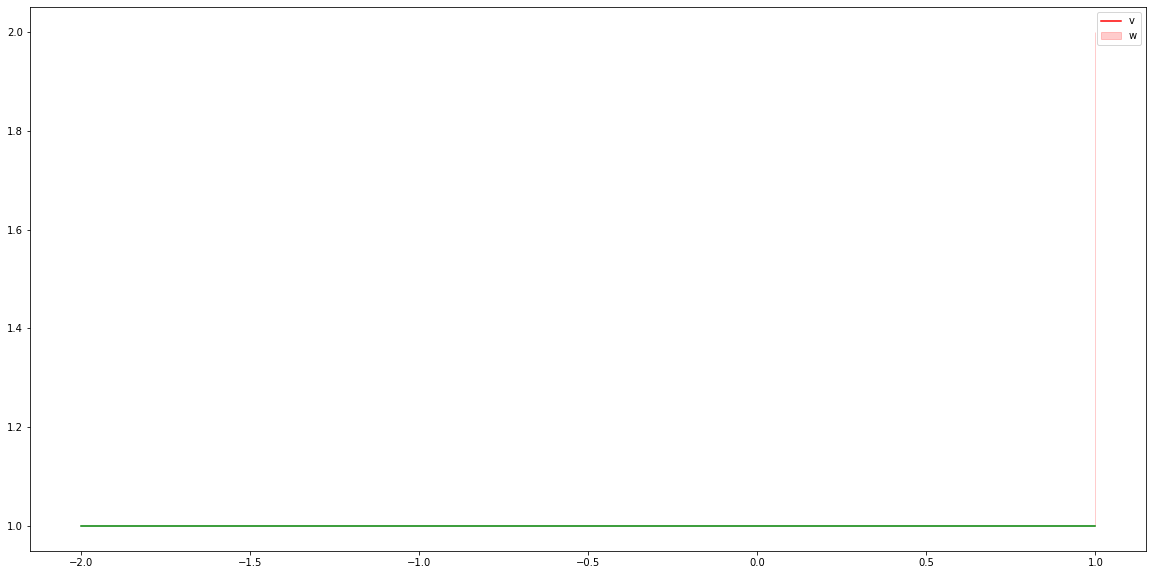

In [44]:
# We've added a 1 to the vector to add dimensionality to them
plt.figure(figsize=(20, 10))
sns.lineplot(x=[1, v.numpy()[0]], y=[1, v.numpy()[1]], color='red')
sns.lineplot(x=[1, w.numpy()[0]], y=[1, w.numpy()[1]], color='green')
plt.legend(labels=['v', 'w'])
plt.show();

#### We've taken some time to get to know some of the operations on matrices and vectors but now it's time to start solving linear equations with the help of them.

#### But before we do so let's just have a look at some if the scenarios we will face when solving linear equations of the type $Av=b$

### 1. If we have a matrix equation $
\begin{bmatrix}
1 & 3\\
3 & 9
\end{bmatrix}
=
\begin{bmatrix}
0\\
9
\end{bmatrix}
$
#### we can deduce these following equations:
#### 1- $1v_{1} + 3v_{2}=9$
#### 2- $3v_{1} + 9v_{2}=0$

#### Now let's say we multiply the first equation by 3 which gives us $3v_{1} + 9v_{2}=27$ but wasn't $3v_{1} + 9v_{2}$ equal to 0 ?
#### This means that these two equations don't intersect and therefore have no solution
#### Normally when one column is dependent on another(aka is a multiple of another column) all combinations of $\begin{bmatrix}1\\3\end{bmatrix}$ and $\begin{bmatrix}3\\9\end{bmatrix}$ lie in the same direction
#### However, seeing as $b$ which is $\begin{bmatrix}9\\0\end{bmatrix}$ is not a combination of the two column vectors and does not lie on the same line, it cannot be a solution to the equation

### 2. But if $b=\begin{bmatrix}5\\15\end{bmatrix}$ it's another story
#### If you try the same thing we did with $\begin{bmatrix}9\\0\end{bmatrix}$ but with our new $b$ you'll find that there is a solution to the equation (new $b$ is on the line)

#### Since $b$ is on the line and is a combination of the dependent vectors there are infinite number of solutions ($b$ is in the column space if $A$)
### There is only one specific combination of $v$ that produces $b$

### 3. There are infinite combinations of the column vectors that result in the zero vector $(0)$.
#### For example for any value $a$ we have the following:
#### $3a\begin{bmatrix}1\\3\end{bmatrix}-1a\begin{bmatrix}3\\9\end{bmatrix}=\begin{bmatrix}0\\0\end{bmatrix}$

### This concept is what makes the "Complete Solution"
#### The complete solution is all the possible ways to produce $b=\begin{bmatrix}5\\15\end{bmatrix}$


# Solving linear equations in $n-dimensions$